# LLN and CLT
## 1. Overview
本节介绍大数定理和中心极限定理，另外进行扩展：

- Delta Method：在统计里是求渐进分布asymptotic distribution的，是一种转化的方法，用a随机变量转化为b随机变量，可用于求样本均值、样本矩函数等。
- The multivariate case

## 2. Relationship
CLT改良了LLN，LLN描述的是在什么条件下随着样本量的上升样本矩收敛为总体矩，CLT描述在什么比率下随着样本量的上升样本矩收敛为总体矩。


## 3. LLN 大数定律
### The Classical LLN
 强大数定律：
 $X_{1}...X_{n}$独立同分布的随机变量，并有共同的分布F，总体均值为$\mu$
 $$\mu = \mathbb EX = \int xF(dx)$$
 样本均值：
 $$\overline{X}_{n} = \frac{1}{n}\sum_{i=1}^{n} X_i$$
Kolmogorov 强大数定律为：如果$\mathbb E|X|$是有限的，则有：
$$\mathbb{P} = \{\overline{X}_{n} \rightarrow \mu~~as~~  n\rightarrow \infty\}=1$$
样本均值几乎确定收敛于(almost surely convergence)总体均值   
弱大数定律为依概率收敛总体均值  

http://students.brown.edu/seeing-theory 

### Simulation
生成独立同分布的变量，并画出当n增加时$\overline{X}_{n}$的变化。
每一个点代表随机变量$X_i$ , 作图要说明$\overline{X}_n$收敛到总体均值$\mu$

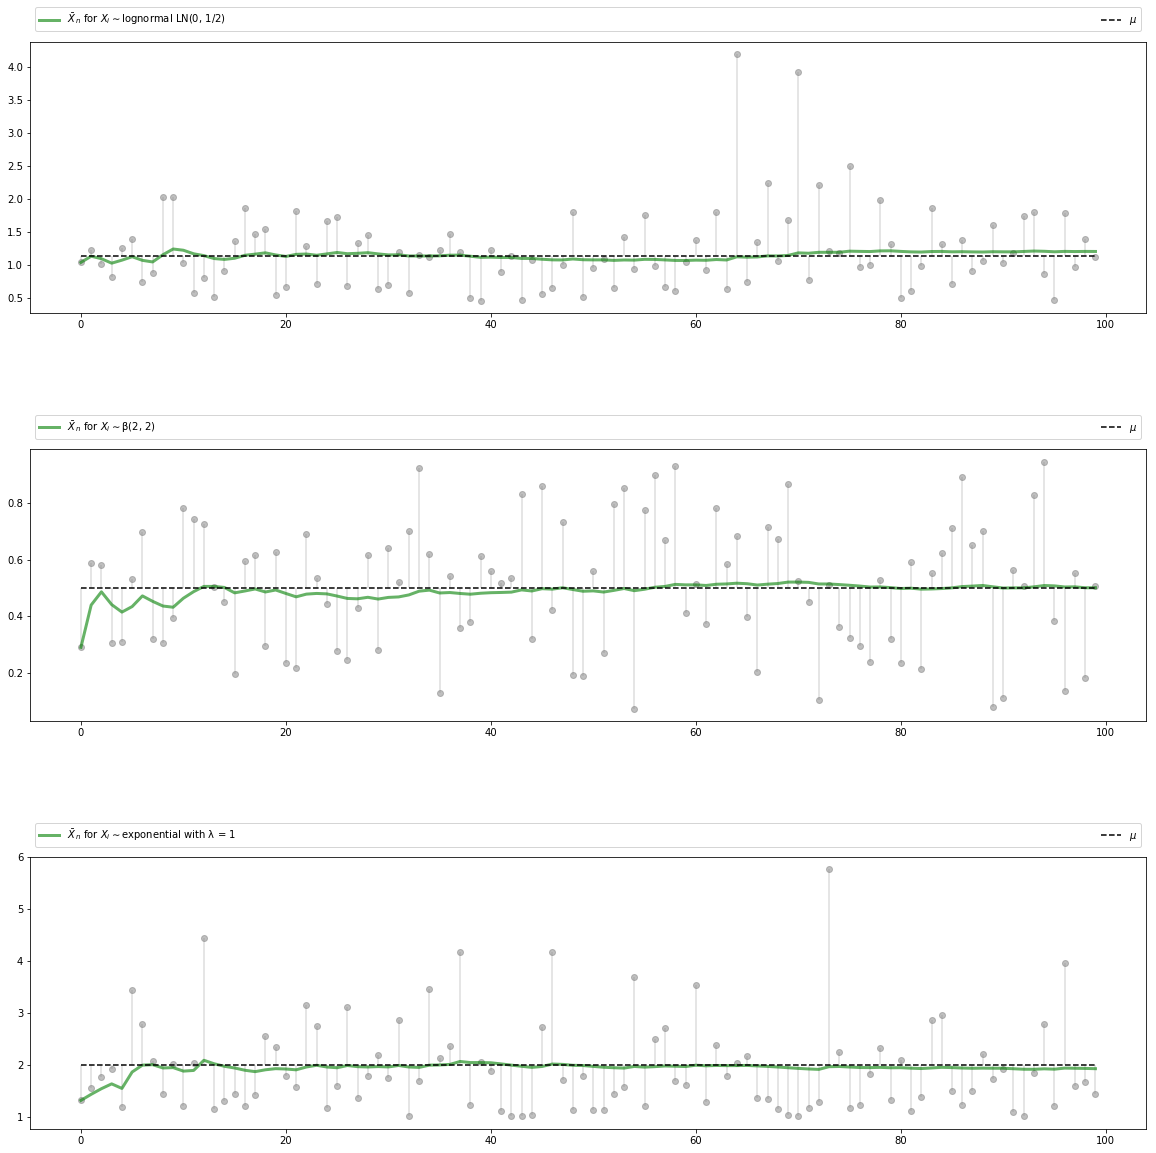

In [1]:
import random
import numpy as np
from scipy.stats import t, beta, lognorm, expon, gamma, poisson
import matplotlib.pyplot as plt
import matplotlib

#from jupyterthemes import jtplot
#jtplot.style(theme='grade3')

n = 100

#matplotlib.style.use('ggplot')

# == Arbitrary collection of distributions == #
distributions = {"student's t with 10 degrees of freedom": t(10),
                 "β(2, 2)": beta(2, 2),
                 "lognormal LN(0, 1/2)": lognorm(0.5),
                 "γ(5, 1/2)": gamma(5, scale=2),
                 "poisson(4)": poisson(4),
                 "exponential with λ = 1": expon(1)}

# == Create a figure and some axes == #
num_plots = 3
fig, axes = plt.subplots(num_plots, 1, figsize=(20, 20))
# == Set some plotting parameters to improve layout == # legend 位置
bbox = (0., 1.02, 1., .102)
legend_args = {'ncol': 2,
               'bbox_to_anchor': bbox,
               'loc': 3,
               'mode': 'expand'}
plt.subplots_adjust(hspace=0.5)

for ax in axes:
    # == Choose a randomly selected distribution == #
    name = random.choice(list(distributions.keys()))  # keys 返回字典的键
    distribution = distributions.pop(name)   #pop() 函数用于移除列表中的一个元素   aList = [123, 'xyz', 'zara', 'abc'];
                                            # print ("A List : ", aList.pop())  >>>  A List :  abc
    

    # == Generate n draws from the distribution == #
    data = distribution.rvs(n)

    # == Compute sample mean at each n == #
    sample_mean = np.empty(n)     #创建一个没有使用特定值来初始化的数组，传入shape
    for i in range(n):
        sample_mean[i] = np.mean(data[:i+1])         # 一维数组 arr_name[start: end: step]； 多维数组 arr_name[行操作, 列操作]

    # == Plot == #  
    ax.plot(list(range(n)), data, 'o', color='grey', alpha=0.5)
    axlabel = '$\\bar X_n$ for $X_i \sim$' + name
    ax.plot(list(range(n)), sample_mean, 'g-', lw=3, alpha=0.6, label=axlabel)  #'g-'为线样式  
    m = distribution.mean()
    ax.plot(list(range(n)), [m] * n, 'k--', lw=1.5, label='$\mu$')
    ax.vlines(list(range(n)), m, data, lw=0.2)  #绘制垂直线
    ax.legend(**legend_args)     #使用单个*会将所有的参数，放入一个元组供函数使用;使用两个**会将所有的关键字参数，放入一个字典供函数使用
            

plt.show()

### 不满足大数定律的情况：Infinite Mean
例如 柯西分布：柯西分布的重要特性之一就是期望和方差均不存在。其密度为：
$$f(x)=\frac{1}{\pi (1+x^2)} \ (x\in \mathbb R)$$
柯西分布特征函数
$$\phi(t)=\mathbb E e^{itX}=\int e^{itx}f(x)dx=e^{-|t|}$$
样本均值特征函数
$$
\begin{aligned}
\mathbb E e^{it\bar X_n} & =\mathbb E \exp\{i\frac{t}{n}\sum_{j=1}^n X_j\} \\
& = \mathbb E \prod_{j=1}^n\exp\{i\frac{t}{n}X_j\} \\
& = \prod_{j=1}^n\mathbb E\exp\{i\frac{t}{n}X_j\}=[\phi(t/n)]^n
\end{aligned}
$$
$\bar X_n$并不收敛于一点。

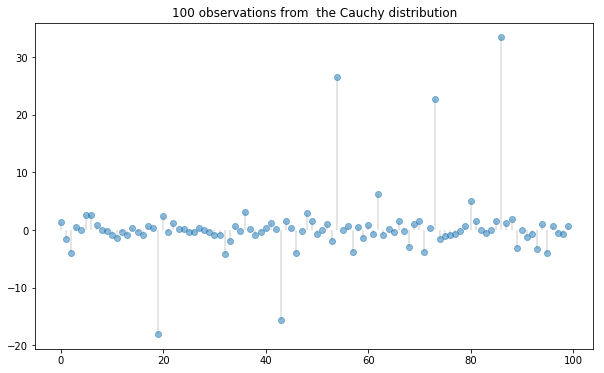

In [2]:
from scipy.stats import cauchy

n = 100
distribution = cauchy()

fig, ax = plt.subplots(figsize=(10, 6))
data = distribution.rvs(n)
ax.plot(list(range(n)), data, linestyle='', marker='o', alpha=0.5)
ax.vlines(list(range(n)), 0, data, lw=0.2)
ax.set_title(f"{n} observations from  the Cauchy distribution")

plt.show()

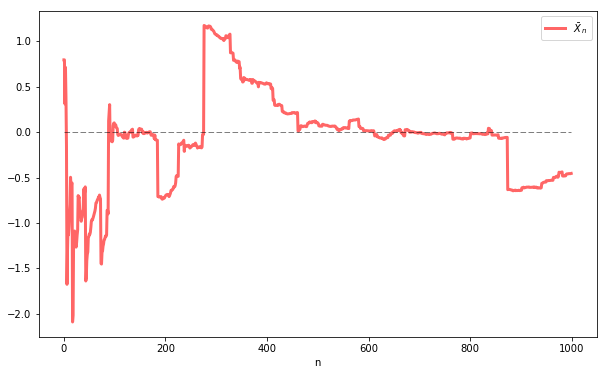

In [3]:
n = 1000
distribution = cauchy()

fig, ax = plt.subplots(figsize=(10, 6))
data = distribution.rvs(n)

# == Compute sample mean at each n == #
sample_mean = np.empty(n)

for i in range(1, n):
    sample_mean[i] = np.mean(data[:i])  

# == Plot == #
ax.plot(list(range(n)), sample_mean, 'r-', lw=3, alpha=0.6,
        label='$\\bar X_n$')
ax.plot(list(range(n)), [0] * n, 'k--', lw=0.5)
ax.legend()
plt.xlabel("n")
plt.show()


## 4. CLT 中心极限定理
### Statement of Theorem
随机抽取的n个独立同分布的随机变量$X_1,...,X_n$,均值为$\mu$,方差为$\sigma ^2$
    $$\sqrt{n} (\overline{X}_{n} - \mu )\xrightarrow{d} N(0,\sigma ^2)~~ as ~~ n \rightarrow \infty$$

任一具有有限二阶矩的分布，随着随机变量数量的增加，其分布图形会逐渐变为一个高斯曲线

### Intuition
**伯努利分布**  
令$\mathbb{P} \{X_i =0\} = \mathbb{P} \{X_i =1\} = 0.5$
画出n=1,2,4,8的probability mass function。可以看做实验n次，硬币朝上次数的概率。概率质量函数即随机变量在各个可能值上对应的概率

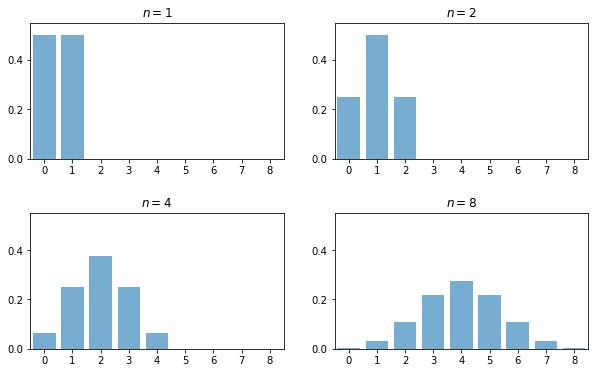

In [12]:
from scipy.stats import binom

fig,axes = plt.subplots(2,2,figsize = (10,6))
plt.subplots_adjust(hspace=0.4)
axes = axes.flatten()   #.flatten()：对数组进行降维，返回折叠后的一维数组，原数组不变
ns = [1,2,4,8]
dom = list(range(9))

for ax, n in zip(axes, ns):  #zip 打包成元组 并返回由这个元组组成的列表
    b = binom(n, 0.5)       #伯努利分布
    ax.bar(dom, b.pmf(dom), alpha=0.6, align='center')    #ax.bar(x,y,....)
    '''
    binom.pmf(k, *args, **kwds)
    Probability mass function at k of the given RV.
    '''
    ax.set(xlim=(-0.5, 8.5), ylim=(0, 0.55),
           xticks=list(range(9)), yticks=(0, 0.2, 0.4),   # 横轴标出0~8
           title=f'$n = {n}$')        # 以f开头表示在字符串内支持大括号内的python 表达式
plt.show()

In [13]:
zip(axes, ns)

### Simulation 1
 选择任意的一个符合分布F（以下模拟中用指数分布 $F（x）=1- e^{-\lambda x}$）的随机数列    
 生成$Y_{n}=\sqrt{n}(\overline{x}_{n} -\mu)$,用直方图来衡量其分布，并同$N(0,\sigma ^2)$进行比较


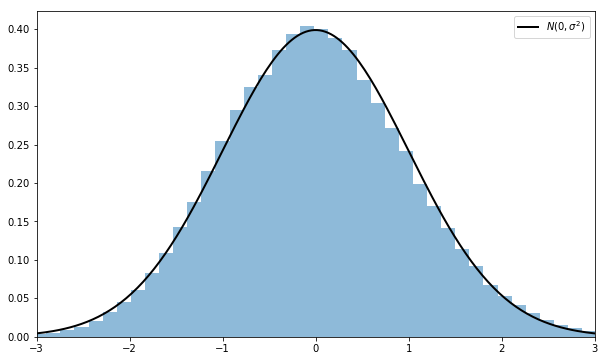

In [6]:
from scipy.stats import norm


# == Set parameters == #
n = 250                  # Choice of n
k = 100000               # Number of draws of Y_n
distribution = expon(2)  # Exponential distribution, λ = 1/2
μ, s = distribution.mean(), distribution.std()

# == Draw underlying RVs. Each row contains a draw of X_1,..,X_n == #
data = distribution.rvs((k, n))
# == Compute mean of each row, producing k draws of \bar X_n == #
sample_means = data.mean(axis=1)         #axis=1 算行
# == Generate observations of Y_n == #
Y = np.sqrt(n) * (sample_means - μ)

# == Plot == #
# 设置图形参数
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * s, 3 * s
ax.set_xlim(xmin, xmax)
# 画直方图
ax.hist(Y, bins=60, alpha=0.5, normed=True)
# 画正态分布图
xgrid = np.linspace(xmin, xmax, 200)     #linspace(start,stop,N)创建等差数列   曲线平滑程度
ax.plot(xgrid, norm.pdf(xgrid, scale=s), 'k-', lw=2, label='$N(0, \sigma^2)$')   
ax.legend()

plt.show()

### Simulation 2
当n增加时，来考察$Y_n$的分布，$Y_n=\sqrt{n}(\overline{X}_{n}-\mu)$,$\mu =0$  
当n=1时，$Y_1 = X_1$  
当n=2时，$Y_2 = (X_1 + X_2)/\sqrt{2}$  
随n的增加，$Y_n$的分布会趋于一个钟形
下图就是画出n从1到5的$Y_n$的分布曲线，其中$X_i ∼ f,f$是三个不同Beta densities 的凸组合

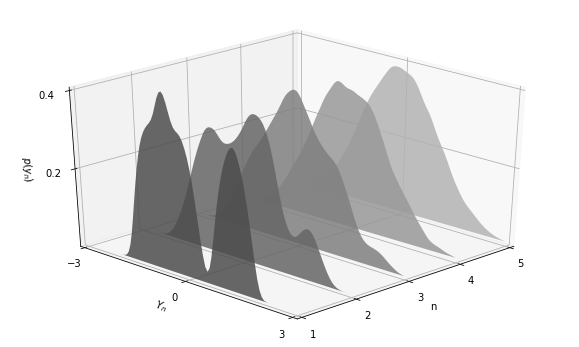

In [7]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection


beta_dist = beta(2, 2)

def gen_x_draws(k):
    """
    Returns a flat array containing k independent draws from the
    distribution of X, the underlying random variable.  This distribution is
    itself a convex combination of three beta distributions.
    """
    bdraws = beta_dist.rvs((3, k))
    # == Transform rows, so each represents a different distribution == #
    bdraws[0, :] -= 0.5      #每一行加上或减去不同的值
    bdraws[1, :] += 0.6
    bdraws[2, :] -= 1.1
    # == Set X[i] = bdraws[j, i], where j is a random draw from {0, 1, 2} == #
    js = np.random.randint(0, 3, size=k)   #randint:随机生一个整数int类型,可设定最低和最大值  代码这里应该是3
    X = bdraws[js, np.arange(k)]        #
    # == Rescale, so that the random variable is zero mean == # 标准化
    m, sigma = X.mean(), X.std()
    return (X - m) / sigma 

nmax = 5
reps = 100000
ns = list(range(1, nmax + 1))

# == Form a matrix Z such that each column is reps independent draws of X == #
Z = np.empty((reps, nmax))
for i in range(nmax):
    Z[:, i] = gen_x_draws(reps)          #使Z的每一列都是随机变量分别为X_1 X_2 X_3 X_4 X_5
# == Take cumulative sum across columns
S = Z.cumsum(axis=1)         #     >>> a = np.array([[1,2,3], [4,5,6]])   np.cumsum(a,axis=1)  
                             #   array([[ 1,  3,  6],
                             #        [ 4,  9, 15]])

# == Multiply j-th column by sqrt j == #
Y = (1 / np.sqrt(ns)) * S

# == Plot == #   https://matplotlib.org/gallery/index.html

fig = plt.figure(figsize = (10, 6))
ax = fig.gca(projection='3d')

a, b = -3, 3
gs = 100
xs = np.linspace(a, b, gs) 

# == Build verts == #
greys = np.linspace(0.3, 0.7, nmax)     
verts = []
for n in ns:
    density = gaussian_kde(Y[:, n-1])  
    ys = density(xs)
    verts.append(list(zip(xs, ys)))             #得到绘制分布图的概率密度，储存至verts

poly = PolyCollection(verts, facecolors=[str(g) for g in greys])  ##verts 输入x,y的点
poly.set_alpha(0.85)
ax.add_collection3d(poly, zs=ns, zdir='x')   #2D图增加z轴信息至3D   zdir 在2d形状上设定哪一个坐标轴作为Z轴

ax.set(xlim3d=(1, nmax), xticks=(ns), ylabel='$Y_n$', zlabel='$p(y_n)$',
       xlabel=("n"), yticks=((-3, 0, 3)), ylim3d=(a, b),
       zlim3d=(0, 0.4), zticks=((0.2, 0.4)))
ax.invert_xaxis()
ax.view_init(30, 45)  # Rotates the plot 30 deg on z axis and 45 deg on x axis
plt.show()

In [8]:
beta_dist = beta(2, 2)
bdraws = beta_dist.rvs((3, k))
# == Transform rows, so each represents a different distribution == #
bdraws[0, :] -= 0.5      #每一行加上或减去不同的值
bdraws[1, :] += 0.6
bdraws[2, :] -= 1.1
# == Set X[i] = bdraws[j, i], where j is a random draw from {0, 1, 2} == #
js = np.random.randint(0, 3, size=k)   #randint:随机生一个整数int类型,可设定最低和最大值  代码这里应该是3
X = bdraws[js, np.arange(k)] 
print('bdraws:',bdraws )
print('js:',js)
print('X:',X)

bdraws: [[-0.21176885  0.02793893 -0.32381026 ..., -0.24311794 -0.14089997
  -0.0531725 ]
 [ 0.87426962  1.16435278  0.91480458 ...,  1.21192618  1.16064744
   1.31541978]
 [-0.57194587 -0.4973166  -0.84488551 ..., -0.7963686  -0.62735319
  -0.71019168]]
js: [2 2 2 ..., 0 2 2]
X: [-0.57194587 -0.4973166  -0.84488551 ..., -0.24311794 -0.62735319
 -0.71019168]


### Exercises 1
若$\mathbb{R} \rightarrow \mathbb{R}$ 可微且 $g'(\mu) \neq 0$则
    $$\sqrt{n} \{g(\overline{X}_{n}) - g(\mu)\} \xrightarrow{d} N(0,g'(\mu)^2 \sigma ^2 ) ~~as~~ n\rightarrow \infty$$  
令随机变量$X_i$满足$[0,\pi /2]$均匀分布，且$g(x)=sin(x)$ 类似simulation1 画出近似分布并同正态分布曲线进行比较

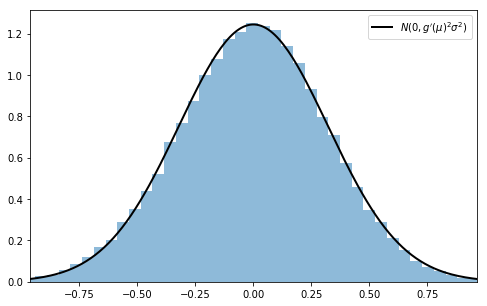

In [19]:
from scipy.stats import uniform


# == Set parameters == #
n = 250
replications = 100000
distribution = uniform(loc=0, scale=(np.pi / 2))
μ, s = distribution.mean(), distribution.std()

g = np.sin
g_prime = np.cos

# == Generate obs of sqrt{n} (g(X_n) - g(μ)) == #
data = distribution.rvs((replications, n))
sample_means = data.mean(axis=1)  # Compute mean of each row
error_obs = np.sqrt(n) * (g(sample_means) - g(μ))

# == Plot == #
asymptotic_sd = g_prime(μ) * s
fig, ax = plt.subplots(figsize=(8, 5))
xmin = -3 * g_prime(μ) * s
xmax = -xmin
ax.set_xlim(xmin, xmax)
ax.hist(error_obs, bins=60, alpha=0.5, normed=True)
xgrid = np.linspace(xmin, xmax, 200)
lb = "$N(0, g'(\mu)^2  \sigma^2)$"
ax.plot(xgrid, norm.pdf(xgrid, scale=asymptotic_sd), 'k-', lw=2, label=lb)
ax.legend()
plt.show()

### The Multivariate Case
一个随机向量$\mathbf X$由k个随机变量组成的序列构成$(X_1, \ldots, X_k)$
$\mathbb E [\mathbf X]$ 为:  

$$\begin{split}\mathbb E [\mathbf X]
:=
\left(
\begin{array}{c}
    \mathbb E [X_1] \\
    \mathbb E [X_2] \\
    \vdots \\
    \mathbb E [X_k]
\end{array}
\right)
=
\left(
\begin{array}{c}
    \mu_1 \\
    \mu_2\\
    \vdots \\
    \mu_k
\end{array}
\right)
=: \boldsymbol \mu\end{split}$$

$\mathbf X$的方差-协方差矩阵表示为$\Sigma$：

$$\begin{split}Var[\mathbf X]
=
\left(
\begin{array}{ccc}
    \mathbb E [(X_1 - \mu_1)(X_1 - \mu_1)]
        & \cdots & \mathbb E [(X_1 - \mu_1)(X_k - \mu_k)] \\
    \mathbb E [(X_2 - \mu_2)(X_1 - \mu_1)]
        & \cdots & \mathbb E [(X_2 - \mu_2)(X_k - \mu_k)] \\
    \vdots & \vdots & \vdots \\
    \mathbb E [(X_k - \mu_k)(X_1 - \mu_1)]
        & \cdots & \mathbb E [(X_k - \mu_k)(X_k - \mu_k)] \\
\end{array}
\right)\end{split}$$

令
$$\bar{\mathbf X}_n := \frac{1}{n} \sum_{i=1}^n \mathbf X_i$$

**LLN:** $$\mathbb P \left\{ \bar{\mathbf X}_n \to \boldsymbol \mu \text{ as } n \to \infty \right\} = 1$$
其中$\bar{\mathbf X}_n \to \boldsymbol \mu$表示$\| \bar{\mathbf X}_n - \boldsymbol \mu \| \to 0$  
若$\Sigma$是有限的，则**CLT:**
$$\sqrt{n} ( \bar{\mathbf X}_n - \boldsymbol \mu ) \stackrel { d } {\to} N(\mathbf 0, \Sigma)
\quad \text{as} \quad
n \to \infty$$

### Exercise 2   Multivariate 下的中心极限
$\mathbf{X}_1,...,\mathbf{X}_n$是一组服从独立同分布的向量。  
$\boldsymbol \mu := \mathbb E [\mathbf X_i]$，$\sum$为$X_{i}$的方差-协方差矩阵  
则满足$\sqrt{n} ( \bar{\mathbf X}_n - \boldsymbol \mu ) \stackrel { d } {\to} N(\mathbf 0, \Sigma)$  
标准化右侧，首先$X$是在$\mathbb{R}^{k}$中的随机向量，$\mathbf{A}$为$k\times k$的常数矩阵，则有
$$Var[\mathbf{AX}] = \mathbf{A} Var[\mathbf{X}]\mathbf{A}'$$
根据连续映射定理，如果在$\mathbb{R}$中$Z_n \xrightarrow{d} Z$则有：
$$\mathbf A \mathbf Z_n
\stackrel{d}{\to} \mathbf A \mathbf Z$$
假设$\mathbf{S}$是一个$k\times k$的对称正定矩阵，那么存在一个对称的正定矩阵$\mathbf{Q}$满足
$$\mathbf Q \mathbf S\mathbf Q' = \mathbf I$$
其中$\mathbf I$是一个$k\times k$的 单位矩阵
综上可以得到:
$$\mathbf Z_n := \sqrt{n} \mathbf Q ( \bar{\mathbf X}_n - \boldsymbol \mu )
\stackrel{d}{\to}
\mathbf Z \sim N(\mathbf 0, \mathbf I)$$
再一次运用连续映射定理，得到：
$$\| \mathbf Z_n \|^2
\stackrel{d}{\to}
\| \mathbf Z \|^2 \tag{1}$$
最后得到:
    $$n \| \mathbf Q ( \bar{\mathbf X}_n - \boldsymbol \mu ) \|^2
\stackrel{d}{\to}
\chi^2(k)  \tag{2}$$

通过模拟来验证上式，其中
\begin{split}\mathbf X_i
:=
\left(
\begin{array}{c}
    W_i \\
    U_i + W_i
\end{array}
\right)\end{split}

$W_i$来自[-1,1]的均匀分布，$U_i$来自[-2,2]的均匀分布，$W_i$，$U_i$相互独立
  
     
首先需要说明$$\sqrt{n} \mathbf Q ( \bar{\mathbf X}_n - \boldsymbol \mu )
\stackrel{d}{\to}
N(\mathbf 0, \mathbf I)$$
令$$\mathbf Y_n := \sqrt{n} ( \bar{\mathbf X}_n - \boldsymbol \mu )
\quad \text{and} \quad
\mathbf Y \sim N(\mathbf 0, \Sigma)$$
根据连续映射定理和多变量中心极限定理可以得到：
$$\mathbf Q \mathbf Y_n
\stackrel{d}{\to}
\mathbf Q \mathbf Y$$
$\mathbf Q \mathbf Y$ 均值为零，
$$\mathrm{Var}[\mathbf Q \mathbf Y]
= \mathbf Q \mathrm{Var}[\mathbf Y] \mathbf Q'
= \mathbf Q \Sigma \mathbf Q'
= \mathbf I$$
$$\Rightarrow\mathbf Q \mathbf Y_n \stackrel{d}{\to} \mathbf Q \mathbf Y \sim N(\mathbf 0, \mathbf I)$$
根据（1）的变换，最终验证（2）

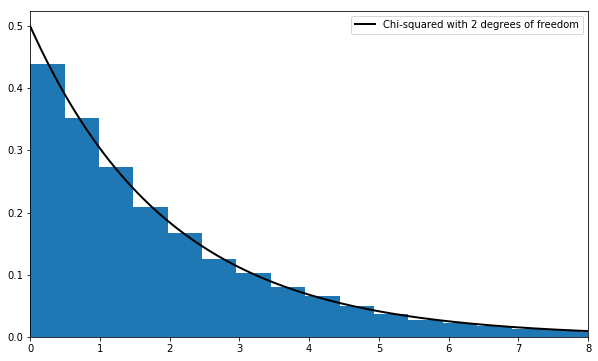

In [10]:
from scipy.stats import chi2
from scipy.linalg import inv, sqrtm

# == Set parameters == #
n = 250
replications = 50000
dw = uniform(loc=-1, scale=2)  # Uniform(-1, 1)    平均分布
du = uniform(loc=-2, scale=4)  # Uniform(-2, 2)
sw, su = dw.std(), du.std()
vw, vu = sw**2, su**2     # **平方
Σ = ((vw, vw), (vw, vw + vu)) 
Σ = np.array(Σ)             #构建x_i 的方差协方差矩阵            

# == Compute Σ^{-1/2} == #
Q = inv(sqrtm(Σ))   # inv求逆 sqrtm 矩阵平凡根

# == Generate observations of the normalized sample mean == Y_n#
error_obs = np.empty((2, replications))
for i in range(replications):
    # == Generate one sequence of bivariate shocks == #
    X = np.empty((2, n))
    W = dw.rvs(n)
    U = du.rvs(n)
    # == Construct the n observations of the random vector == #
    X[0, :] = W
    X[1, :] = W + U
    # == Construct the i-th observation of Y_n == #
    error_obs[:, i] = np.sqrt(n) * X.mean(axis=1)

# == Premultiply by Q and then take the squared norm == #
temp = Q @ error_obs   # @矩阵相乘
chisq_obs = np.sum(temp**2, axis=0)

# == Plot == #
fig, ax = plt.subplots(figsize=(10, 6))
xmax = 8
ax.set_xlim(0, xmax)
xgrid = np.linspace(0, xmax, 200)
lb = "Chi-squared with 2 degrees of freedom"
ax.plot(xgrid, chi2.pdf(xgrid, 2), 'k-', lw=2, label=lb)
ax.legend()
ax.hist(chisq_obs, bins=50, normed=True)
plt.show()